In [5]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data1 = pd.read_csv('CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', delimiter='|')

In [7]:
data2 = pd.read_csv('CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv', delimiter='|')

In [8]:
data3 = pd.read_csv('CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv', delimiter='|')

In [9]:
data4 = pd.read_csv('CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv', delimiter='|')

In [11]:
data5 = pd.read_csv('CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv', delimiter='|')

In [12]:
data6 = pd.read_csv('CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv', delimiter='|')

In [13]:
data7 = pd.read_csv('CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv', delimiter='|')

In [14]:
data8 = pd.read_csv('CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv', delimiter='|')

In [15]:
data9 = pd.read_csv('CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv', delimiter='|',low_memory=False)

In [16]:
data10 = pd.read_csv('CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv', delimiter='|')

In [17]:
# Create a list of DataFrames
data_frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Concatenate the DataFrames in the list into a single DataFrame
merge_data = pd.concat(data_frames, ignore_index=True)

# merge_data now contains all the data from data1 to data10 in a single DataFrame


In [18]:
del data1,data2,data3,data4,data5,data6,data7,data8,data9,data10

In [19]:
merge_data.shape

(25000363, 23)

In [20]:
merge_data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [21]:
merge_data.isnull().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173939
dtype: int64

In [22]:
merge_data.isnull().sum()*100/len(merge_data)

ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
service            0.000000
duration           0.000000
orig_bytes         0.000000
resp_bytes         0.000000
conn_state         0.000000
local_orig         0.000000
local_resp         0.000000
missed_bytes       0.000000
history            0.000000
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
tunnel_parents     0.000000
label              0.000000
detailed-label    36.695223
dtype: float64

In [23]:
colstoreplace = ['uid','id.orig_h','id.resp_h','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','local_resp','history','tunnel_parents','label','detailed-label']

for col in colstoreplace:
  merge_data[col].replace("-",None,inplace=True)

In [24]:
merge_data.isnull().sum() *100/len(merge_data)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.928057
duration           61.062341
orig_bytes         61.062341
resp_bytes         61.062341
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.100463
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     71.805777
dtype: float64

In [25]:
cols_to_drop = ['service','duration','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents','detailed-label','uid','id.orig_h','id.resp_h']
merge_data.drop(columns=cols_to_drop, inplace = True)

In [26]:
merge_data.shape

(25000363, 12)

In [27]:
data = merge_data.copy()

In [28]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_p      float64
 2   id.resp_p      float64
 3   proto          object 
 4   conn_state     object 
 5   missed_bytes   float64
 6   history        object 
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          object 
dtypes: float64(8), object(4)
memory usage: 2.2+ GB


In [29]:
from sklearn.preprocessing import LabelEncoder

cols_to_label = ['proto','conn_state','history','label']
for col in cols_to_label:
  data[col], uniques = data[col].factorize()

In [31]:
dataset = pd.DataFrame(data)

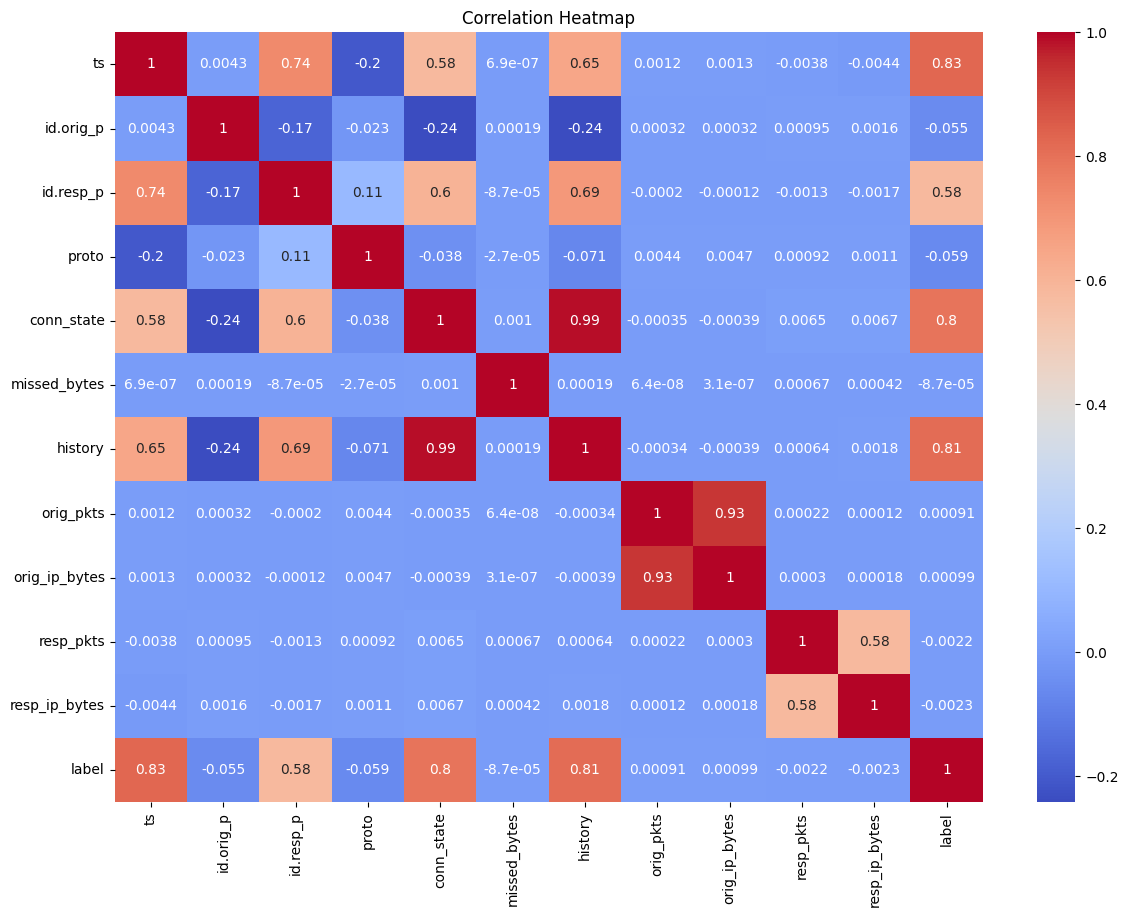

In [32]:
import matplotlib.pyplot as plt

cor = dataset.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
del data, cor, dataset

In [34]:
cols_to_drop1 = ['missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes']
merge_data.drop(columns=cols_to_drop1, inplace = True)

In [35]:
dataset = pd.DataFrame(merge_data)

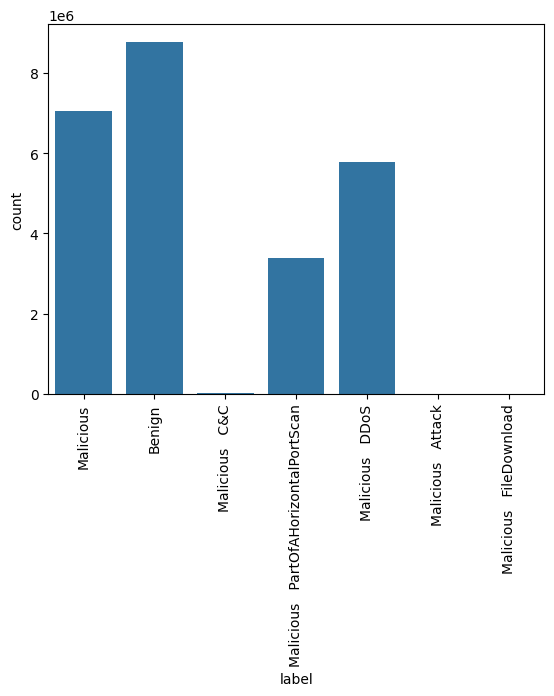

In [36]:
sns.countplot(data=dataset,x='label')
plt.xticks(rotation=90)
plt.show()

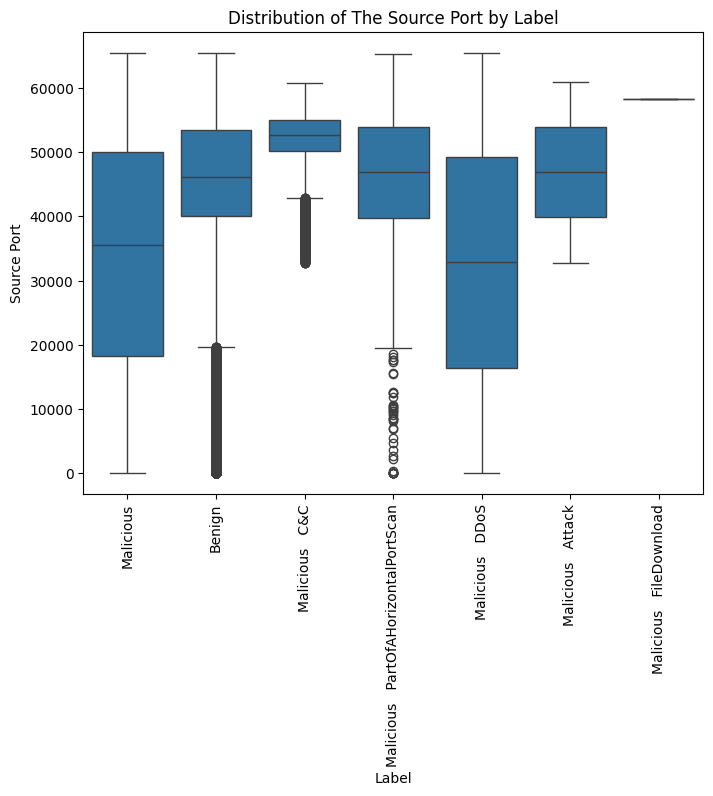

In [37]:
# BOX-PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='label', y='id.orig_p')
plt.xticks(rotation=90)
plt.title('Distribution of The Source Port by Label')
plt.xlabel('Label')
plt.ylabel('Source Port')
plt.show()

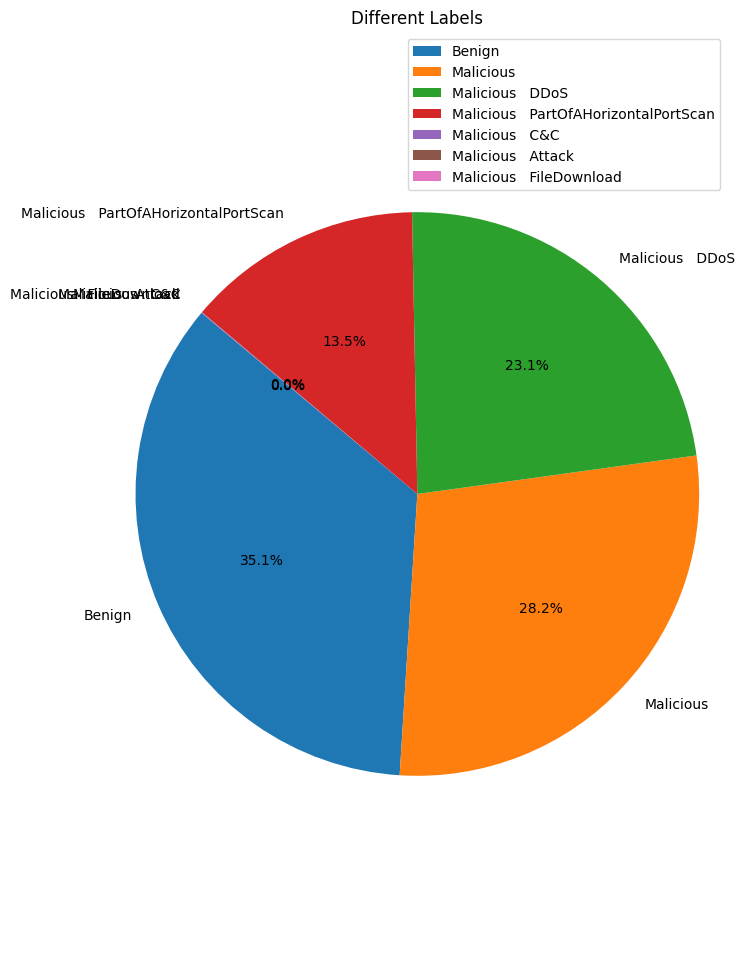

In [38]:
lab_num = dataset['label'].value_counts()
plt.figure(figsize=(8, 12))
plt.pie(lab_num, labels=lab_num.index, autopct='%1.1f%%', startangle=140)
plt.title("Different Labels")
plt.axis('equal')
plt.legend(lab_num.index)
plt.show()

In [39]:
for col in cols_to_label:
  merge_data[col], uniques = merge_data[col].factorize()

In [40]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ts          float64
 1   id.orig_p   float64
 2   id.resp_p   float64
 3   proto       int64  
 4   conn_state  int64  
 5   history     int64  
 6   label       int64  
dtypes: float64(3), int64(4)
memory usage: 1.3 GB


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in dataset.columns:
  dataset[col] = label_encoder.fit_transform(dataset[col])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   ts          int64
 1   id.orig_p   int64
 2   id.resp_p   int64
 3   proto       int32
 4   conn_state  int32
 5   history     int32
 6   label       int32
dtypes: int32(4), int64(3)
memory usage: 953.7 MB


In [42]:
# Removing the outliers
iqr_multiplier = 1.5

filter_data = dataset
for column_name in dataset.columns:
    q1 = dataset[column_name].quantile(0.25)
    q3 = dataset[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    filter_data = filter_data[(filter_data[column_name] >= lower_bound) & (filter_data[column_name] <= upper_bound)]

In [43]:
del dataset

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X = filter_data[['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'history']]
y = filter_data['label']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn import preprocessing

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((14405044, 6), (3601261, 6))

In [48]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

Accuracy: 0.9994465827386574
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1650102
           1       1.00      1.00      1.00   1274108
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00       215
           4       0.93      0.79      0.86        68
           6       1.00      1.00      1.00    676767

    accuracy                           1.00   3601261
   macro avg       0.65      0.63      0.64   3601261
weighted avg       1.00      1.00      1.00   3601261



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
